https://es.shaip.com/blog/ai-based-document-classification/

In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random
import pathlib
print(tf.__version__)

2.16.0-rc0


Descargar imágenes de manos:

In [3]:
url_datos = "https://github.com/CodigoMaquina/code/raw/main/datos/piedra_papel_tijera.zip"
archivo = tf.keras.utils.get_file(origin=url_datos, extract=True)
ruta = str(pathlib.Path(archivo)).replace(".zip", "")
print("Ruta donde están almacenadas las imágenes", ruta)

Ruta donde están almacenadas las imágenes C:\Users\Nuria Gurillo\.keras\datasets\piedra_papel_tijera


Poner imágenes en arrays con su identificador

In [13]:
# Descripción de clases y su identificador
descripcion = ("papel", "piedra", "tijera")
clases = {"papel" : 0, "piedra" : 1, "tijera" : 2}

# Número de imágenes de cada clase
num_img_clase = 700

# Imágenes de Entrenamiento de cada clase: 490
# 70% de las imágenes de una clase = 490 imágenes
num_entrena = round(num_img_clase * 0.70)

# Imágenes de Prueba de cada clase: 210
# 30% de las imágenes de una clase = 210 imágenes
num_prueba = round(num_img_clase * 0.30)

# Creación de arreglos para almacenar datos de Entrenamiento para las 3 clases
# Las imágenes son de 30 (ancho) x 20 (alto)
imagenes_entrena = np.empty((num_entrena * len(clases), 20, 30), dtype="uint8")
clases_entrena = np.empty(num_entrena * len(clases), dtype="uint8")

# Creación de arreglos para almacenar datos de Prueba para las 3 clases
imagenes_prueba = np.empty((num_prueba * len(clases), 20, 30), dtype="uint8")
clases_prueba = np.empty(num_prueba * len(clases), dtype="uint8")

# Cargar datos de Entrenamiento: imágenes de la 0 a la 489
for i in range(num_entrena):
  for clase in clases:
    imagen = Image.open(ruta + "/" + clase + "/" + str(i) + ".png")
    indice_instancia = i + clases[clase] * num_entrena
    imagenes_entrena[indice_instancia] = np.array(imagen)
    clases_entrena[indice_instancia] = clases[clase]

# Cargar datos de Prueba: imágenes de la 490 a la 699
for i in range(num_entrena, num_img_clase):
  for clase in clases:
    imagen = Image.open(ruta + "/" + clase + "/" + str(i) + ".png")
    indice_instancia = i + clases[clase] * num_prueba - num_entrena
    imagenes_prueba[indice_instancia] = np.array(imagen)
    clases_prueba[indice_instancia] = clases[clase]

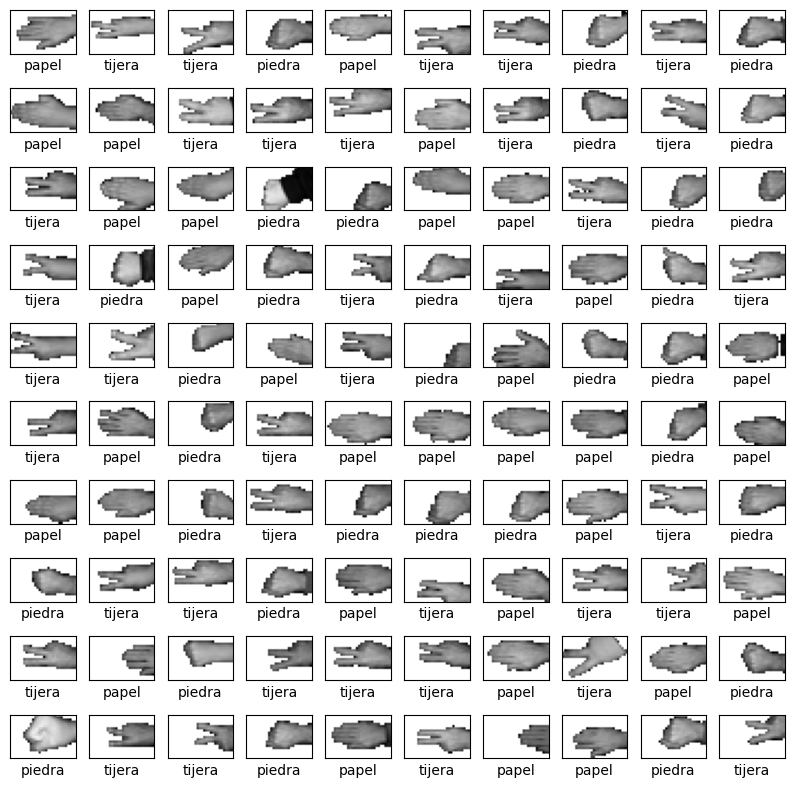

In [32]:
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    # Selección aleatoria de una imagen
    indice = random.randint(0, num_entrena*len(clases) - 1)
    plt.imshow(imagenes_entrena[indice], cmap="gray")
    plt.xlabel(descripcion[clases_entrena[indice]])
    plt.xticks([])
    plt.yticks([])
plt.show()

Escalar imagenes de [0,255] a [0,1]

In [34]:
imagenes_entrena = imagenes_entrena / 255
imagenes_prueba = imagenes_prueba / 255

Crear el la estructura del modelo

In [36]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(20, 30)),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(3),
    tf.keras.layers.Softmax()
])

C:\Users\Nuria Gurillo\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compilar modelo

In [38]:
modelo.compile(optimizer="sgd",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=["accuracy"])

Entrenar modelo

In [40]:
modelo.fit(imagenes_entrena, clases_entrena, epochs=50)

Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3959 - loss: 1.1150 
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4858 - loss: 1.0009
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5868 - loss: 0.9338
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6222 - loss: 0.8792
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6716 - loss: 0.8246
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6901 - loss: 0.8005
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6922 - loss: 0.7885
Epoch 8/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7436 - loss: 0.7118
Epoch 9/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7530 - loss: 0.6839
Epoch 10/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7756 - loss: 0.6562
Epoch 11/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7193 - loss: 0.7025
Epoch 12/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7614 - l

Predecir imágenes de prueba

In [83]:
predicciones = modelo.predict(imagenes_prueba)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [85]:
for instancia in range(num_prueba * len(clases)):
    print(predicciones[instancia])

[9.9363613e-01 5.4187449e-03 9.4511890e-04]
[0.7350845  0.03552572 0.22938985]
[0.9785387  0.01104291 0.01041842]
[0.94540894 0.04626612 0.0083249 ]
[0.19531362 0.7313315  0.07335486]
[0.9680112  0.02021626 0.01177259]
[0.7074478  0.21400839 0.07854374]
[0.982467   0.00392135 0.01361159]
[0.72422767 0.15482628 0.12094608]
[0.33982253 0.5818396  0.07833779]
[0.6457376  0.17442435 0.17983805]
[0.9374341  0.02924944 0.03331647]
[0.54833907 0.03444966 0.41721138]
[0.75275075 0.20568688 0.04156229]
[0.00612875 0.8640058  0.12986551]
[0.850314   0.06623231 0.08345366]
[0.909652   0.029538   0.06081002]
[0.93558013 0.02481374 0.0396061 ]
[0.84977704 0.0398882  0.11033472]
[9.7447473e-01 2.4653750e-02 8.7144366e-04]
[0.8881045  0.06329974 0.0485957 ]
[0.9738399  0.02037621 0.00578382]
[0.46646303 0.08344238 0.45009458]
[0.8943158  0.07870569 0.02697845]
[0.92644006 0.02982025 0.04373959]
[0.46654084 0.01586826 0.51759094]
[0.9341429  0.05940273 0.00645439]
[0.6832371  0.19582057 0.12094236]
[0

In [87]:
# Creación de arreglo para almacenar predicciones
clase_predicha = np.empty(num_prueba * len(clases), dtype = "uint8")

for instancia in range(num_prueba * len(clases)):
  # almacena clase predicha para una imagen dada
  clase_predicha[instancia] = np.argmax(predicciones[instancia])
  if clase_predicha[instancia] == clases_prueba[instancia]:
    print("Probabilidades:", predicciones[instancia],
          "Clase predicha:", clase_predicha[instancia],
          "Clase correcta:", clases_prueba[instancia],
          "La Red Neuronal ACERTÓ")
  else:
    print("Probabilidades:", predicciones[instancia],
          "Clase predicha:", clase_predicha[instancia],
          "Clase correcta:", clases_prueba[instancia],
          "La Red Neuronal ERRÓ")

Probabilidades: [9.9363613e-01 5.4187449e-03 9.4511890e-04] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.7350845  0.03552572 0.22938985] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.9785387  0.01104291 0.01041842] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.94540894 0.04626612 0.0083249 ] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.19531362 0.7313315  0.07335486] Clase predicha: 1 Clase correcta: 0 La Red Neuronal ERRÓ
Probabilidades: [0.9680112  0.02021626 0.01177259] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.7074478  0.21400839 0.07854374] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.982467   0.00392135 0.01361159] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Probabilidades: [0.72422767 0.15482628 0.12094608] Clase predicha: 0 Clase correcta: 0 La Red Neuronal ACERTÓ
Pro

In [89]:
matriz = tf.math.confusion_matrix(clases_prueba, clase_predicha)
print("Matriz de Confusión:\n", matriz.numpy())

Matriz de Confusión:
 [[149  32  29]
 [  0 195  15]
 [  5  22 183]]
